# UNB - PPGI
# Processamento de Imagem
## Trabalho 09

Henrique Brandão

___

Faça um projeto de processamento de imagens interessante utilizando os conhecimentos que você adquiriu durante o curso. 

# Processamento de Imagens em Casos de OCR

In [1]:
import math

import cv2
import pytesseract

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline 

In [2]:
!ls | grep ex

ex-ocr-1.JPG
ex-ocr-2.JPG


## Imagens

In [3]:
f1, f2 = 'ex-ocr-1.JPG', 'ex-ocr-2.JPG'

x1 = cv2.cvtColor(cv2.imread(f1), cv2.COLOR_BGR2GRAY)
x2 = cv2.cvtColor(cv2.imread(f2), cv2.COLOR_BGR2GRAY)

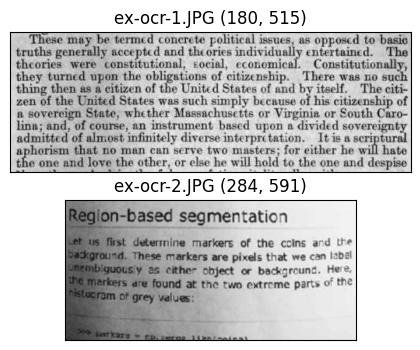

In [4]:
plt.figure(figsize=(6,4))

plt.subplot(2,1,1)
plt.title(f'{f1} {x1.shape}')
plt.imshow(x1, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.subplot(2,1,2)
plt.title(f'{f2} {x2.shape}')
plt.imshow(x2, cmap='gray')
plt.xticks([])
plt.yticks([])

plt.show()

In [5]:
y1 = pytesseract.image_to_string(x1)
y1

' \n\nThese may be termed concrete political issues, as opposed to basic\ntruths generally secepted and thcories individually entertained.\ntheories were ‘constitutional, rocial, economical. Constitutionally,\nthey turned upon the obligations of citizenship. ‘There was no such\nthing then as a citizen of the United States of and by itself. The citi-\nzen of the United States was such simply because of his citizenship of\na sovereign State, whether Massachusetts or Virginia or South Caro-\nlina; and, of course, an instrument based upon a divided sovereignty\n\nmitted of almost infinitely diverse interpretation. It is a scriptural\naphorism that no man can serve two masters; for either he will hate\nthe one and love the other, or else he will hold to the one and despise\n\n \n\n \n\n \n\n \n\x0c'

In [6]:
y2 = pytesseract.image_to_string(x2)
y2

'  \n    \n \n\nine markers of the ccins ard the\nmarkers are pixels that we can label\nther object or background. Here,\nat the two extreme parts of the\n\x0c'

## Processamento

In [7]:
inverte = lambda i: cv2.bitwise_not(i)

gblur = lambda i: cv2.GaussianBlur(i, (3,3), 0)
mblur = lambda i: cv2.medianBlur(i, 3, 0)

kernel = np.ones((3,3), np.uint8)
erosao = lambda x: cv2.erode(x, kernel, iterations=1)
dilatacao = lambda x: cv2.dilate(x, kernel, iterations=1)

tresh = lambda i: cv2.threshold(i, 50, 255, cv2.THRESH_BINARY)[-1]
otsu = lambda i: cv2.threshold(cv2.GaussianBlur(i,(5,5),0),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[-1]
adtresh = lambda i: cv2.adaptiveThreshold(i,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

def dithering(pixels):
    return Image.fromarray(pixels).convert("P", dither=Image.Dither.FLOYDSTEINBERG)

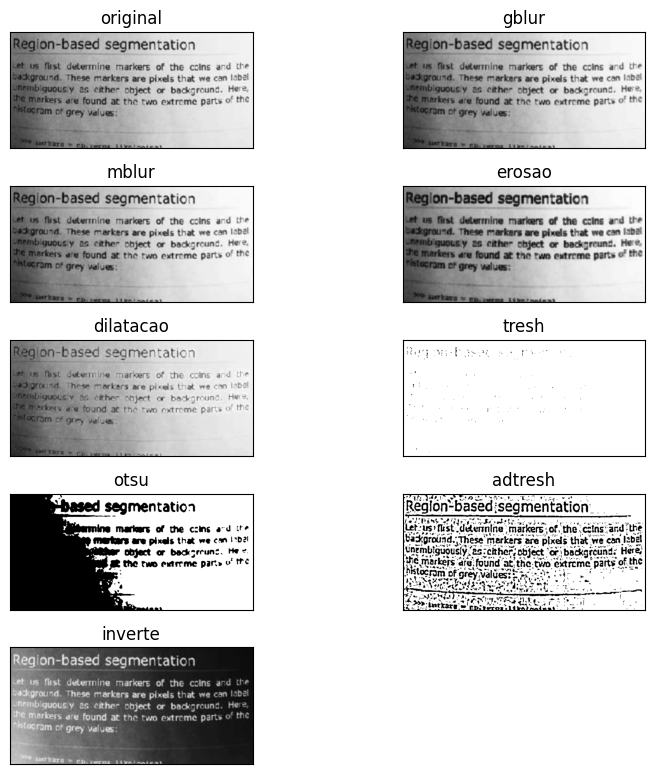

In [8]:
plt.figure(figsize=(8,14))

_ = x2
__ = (
    ('original', _),
    ('gblur', gblur(_)),
    ('mblur', mblur(_)),
    ('erosao', erosao(_)),
    ('dilatacao', dilatacao(_)),
    ('tresh', tresh(_)),
    ('otsu', otsu(_)),
    ('adtresh', adtresh(_)),
    ('inverte', inverte(_)),
)

for i,_ in enumerate(__):
    plt.subplot(len(__),2,i+1)
    plt.title(_[0])
    plt.imshow(_[-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

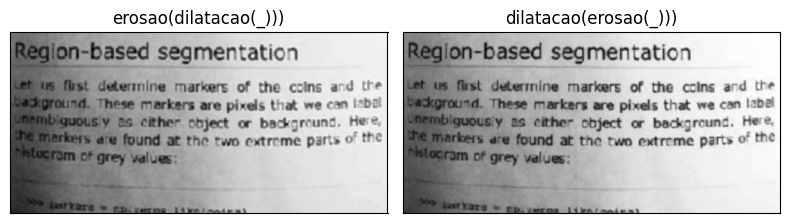

In [9]:
plt.figure(figsize=(8,14))

_ = x2
__ = (
    ('erosao(dilatacao(_)))', erosao(dilatacao(_))),
    ('dilatacao(erosao(_)))', dilatacao(erosao(_))),
)

for i,_ in enumerate(__):
    plt.subplot(len(__),2,i+1)
    plt.title(_[0])
    plt.imshow(_[-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

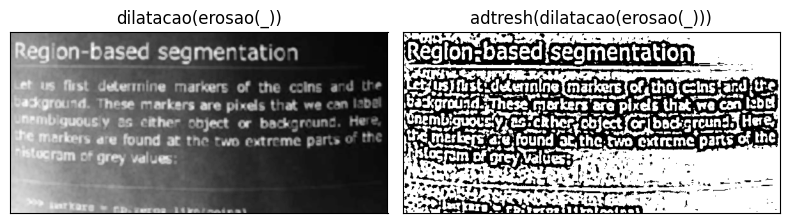

In [10]:
plt.figure(figsize=(8,14))

_ = gblur(inverte(x2))
__ = (
    ('dilatacao(erosao(_))', dilatacao(erosao(_))),
    ('adtresh(dilatacao(erosao(_)))', adtresh(dilatacao(erosao(_)))),
)

for i,_ in enumerate(__):
    plt.subplot(len(__),2,i+1)
    plt.title(_[0])
    plt.imshow(_[-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

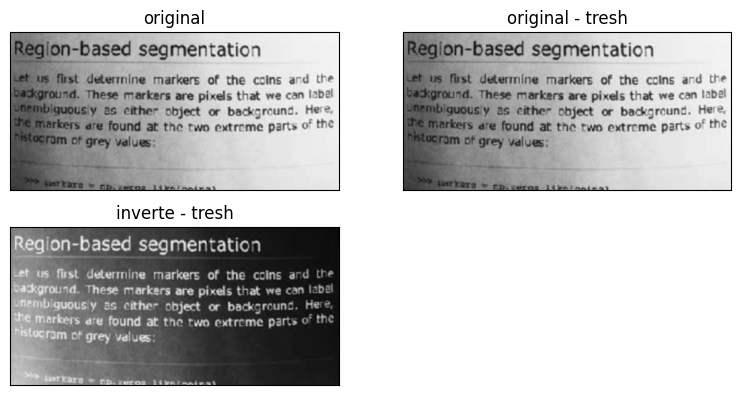

In [11]:
plt.figure(figsize=(8,6))

_ = x2
__ = (
    ('original', x2),
    ('original - tresh', x2 - tresh(x2)),
    ('inverte - tresh', inverte(x2) - tresh(x2)),
)

for i,_ in enumerate(__):
    plt.subplot(len(__),2,i+1)
    plt.title(_[0])
    plt.imshow(_[-1], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

In [12]:
_ = x2

RESULTADOS = (
    ('original', _),
    ('gblur', gblur(_)),  # 1
    ('mblur', mblur(_)),
    ('erosao', erosao(_)),
    ('dilatacao', dilatacao(_)),
    ('tresh', tresh(_)),
    ('otsu', otsu(_)),
    ('adtresh', adtresh(_)),
    ('inverte', inverte(_)),
    ('erosao(dilatacao(_)))', erosao(dilatacao(_))),
    ('dilatacao(erosao(_))', dilatacao(erosao(_))),
    ('adtresh(gblur(inverte(_)))', adtresh(gblur(inverte(_)))),
    ('adtresh(dilatacao(erosao(_)))', adtresh(dilatacao(erosao(_)))),
    ('original - tresh', x2 - tresh(x2)),
    ('inverte - tresh', inverte(x2) - tresh(x2)),
)

RESULTADOS = [(_[0], pytesseract.image_to_string(_[-1])) for _ in RESULTADOS]

for r in RESULTADOS:
    print(f'# {r[0]} {len(r[1])} =============================== #\n{r[1]}')

# original 147 =============================== #
  
    
 

ine markers of the ccins ard the
markers are pixels that we can label
ther object or background. Here,
at the two extreme parts of the

# gblur 173 =============================== #
based segmentation

ine markers of the coins and the
markers are pixels that we can label
either object or backgrounc. Here,

d at the two extreme parts of the

   
  
 
 

# mblur 169 =============================== #
based segmentation

ine markers of the coins and the
Markers are pixels that we can lebel
her object or backgreunc. Here,
‘at the two extreme parts of the

   
  
 

—

# erosao 186 =============================== #
   
    
 
 

| segmentation

determine markers of the ccins ard the

se markers are pixels that we can Isbel
‘tithes object or backgreunc. Here,
oun at the two extreme parts of the

 

# dilatacao 152 =============================== #
   
  
  
 

segmentation

ine Markers of the coins and re
are pixels that we can l